In [1]:
!nvidia-smi

Sun Apr  9 16:24:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.1+cu118
    Uninstalling torchaudio-2.0.1+cu118:
      Successfully uninstalled torchaudio-2.0.1+cu118
ERROR: pip's dependency resolver does not current

In [1]:
import torch
torch.__version__

'1.7.1+cu110'

In [2]:
! [ -e /content ] && pip install -Uqq fastai 

In [3]:
import fastai
fastai.__version__

'2.7.12'

In [4]:
from fastai.vision.all import *

In [5]:
path = Path("drive/MyDrive/flowers")

In [8]:
#Loading the data
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, item_tfms=Resize(224))

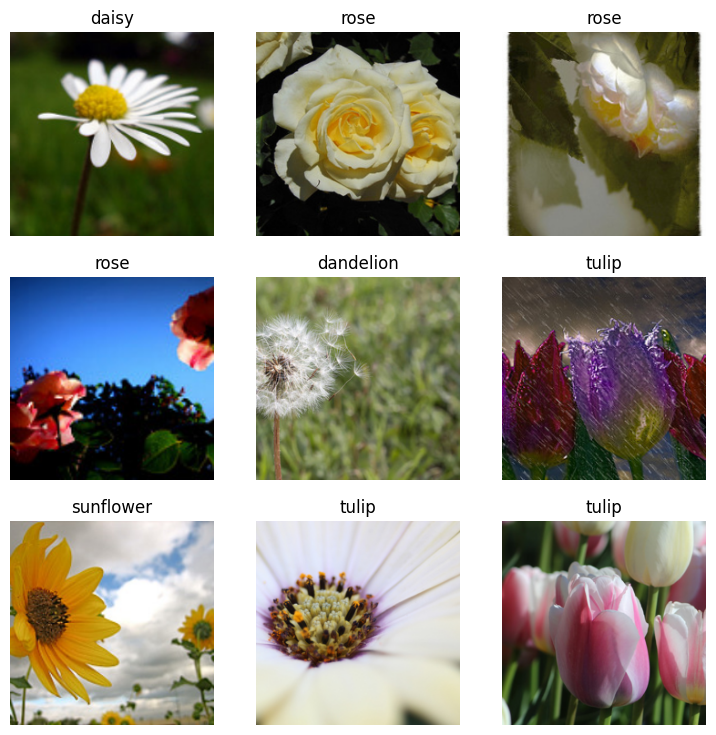

In [9]:
#Showing a batch of data
dls.show_batch()

In [10]:
#Creating a model
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [11]:
#Showing the model summary 
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.0014454397605732083)

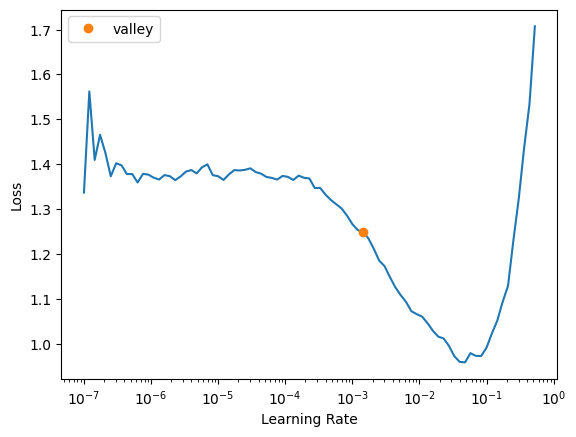

In [13]:
#Choosing the optimal learning rate
learn.lr_find()

In [14]:
#We are now going to fine tune the resnet34 model on our training data
#We have achieved an accuravy of 92%. that's a very good result.
learn.fine_tune(7, 0.0014)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.798954,0.399092,0.127315,0.872685,02:54


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.414923,0.341026,0.107639,0.892361,00:32
1,0.252369,0.302115,0.092593,0.907407,00:32
2,0.161105,0.340181,0.089120,0.910880,00:32
3,0.114520,0.345254,0.087963,0.912037,00:32
4,0.077341,0.328908,0.085648,0.914352,00:33
5,0.048923,0.302002,0.079861,0.920139,00:33
6,0.029647,0.297401,0.075231,0.924769,00:32


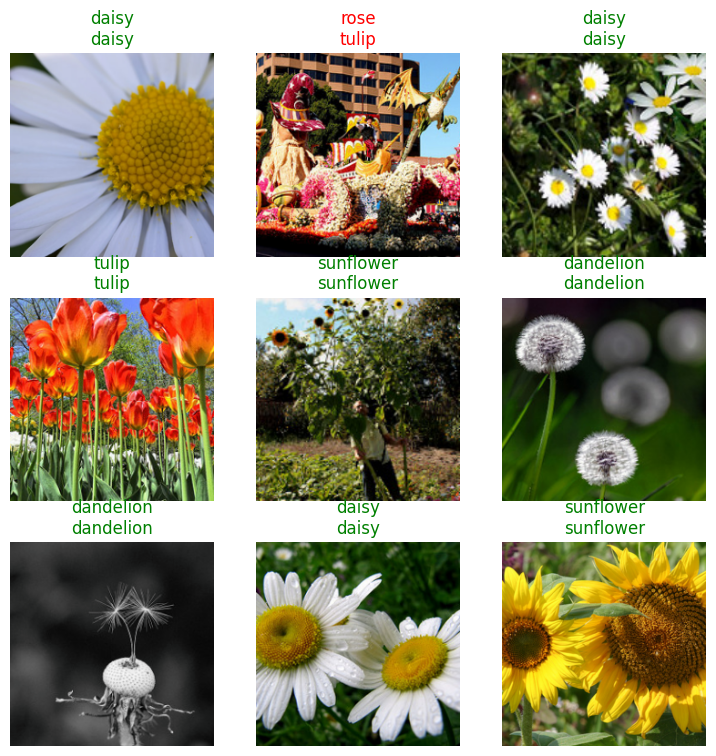

In [15]:
#We are now going to visualize the results predicted by the model for random training data.
#For the random results shown we have a single mistake but this is due to the fact that the flowers on this image
#are very unclear
learn.show_results()

In [16]:
interp = Interpretation.from_learner(learn)

In [17]:
interp2=ClassificationInterpretation.from_learner(learn)

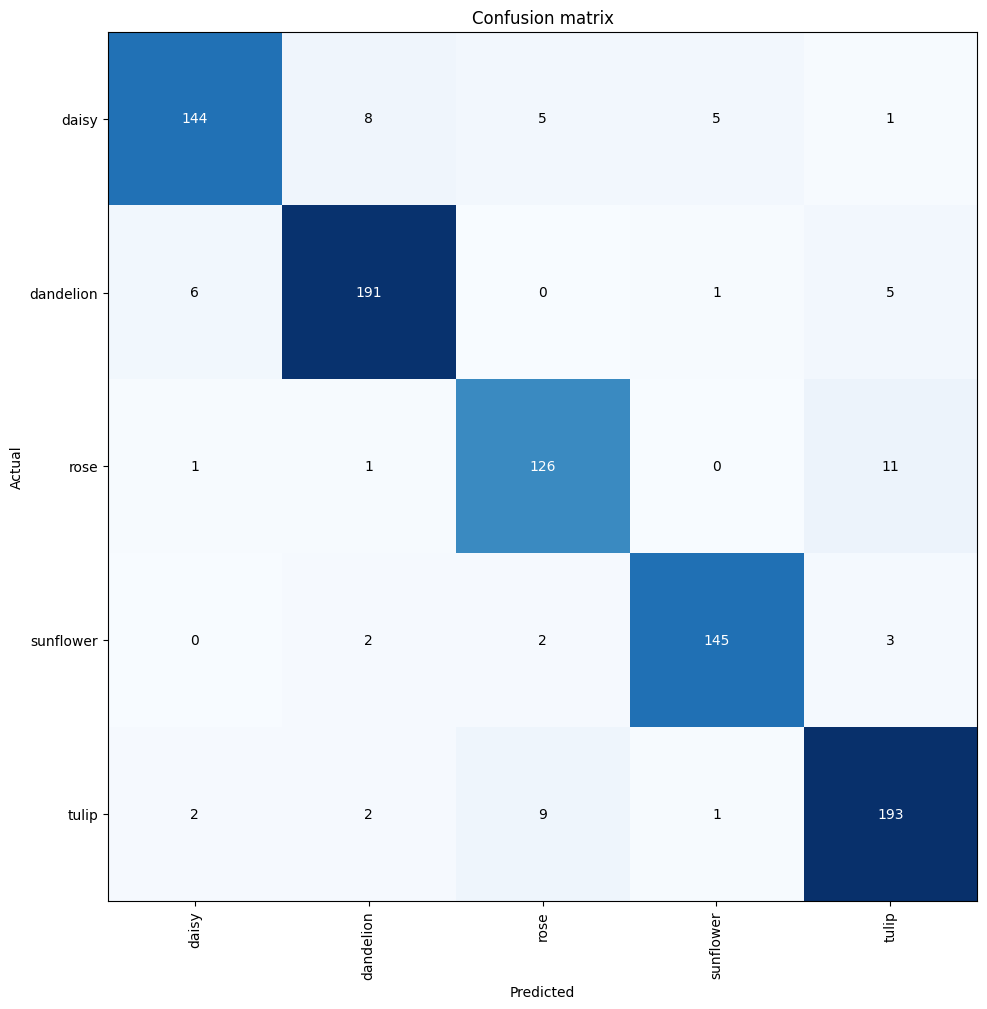

In [18]:
#We can observe that the roses are quite often mistakenly interpreted as tupils. The opposite is true as well.
interp2.plot_confusion_matrix(figsize=(15,10))

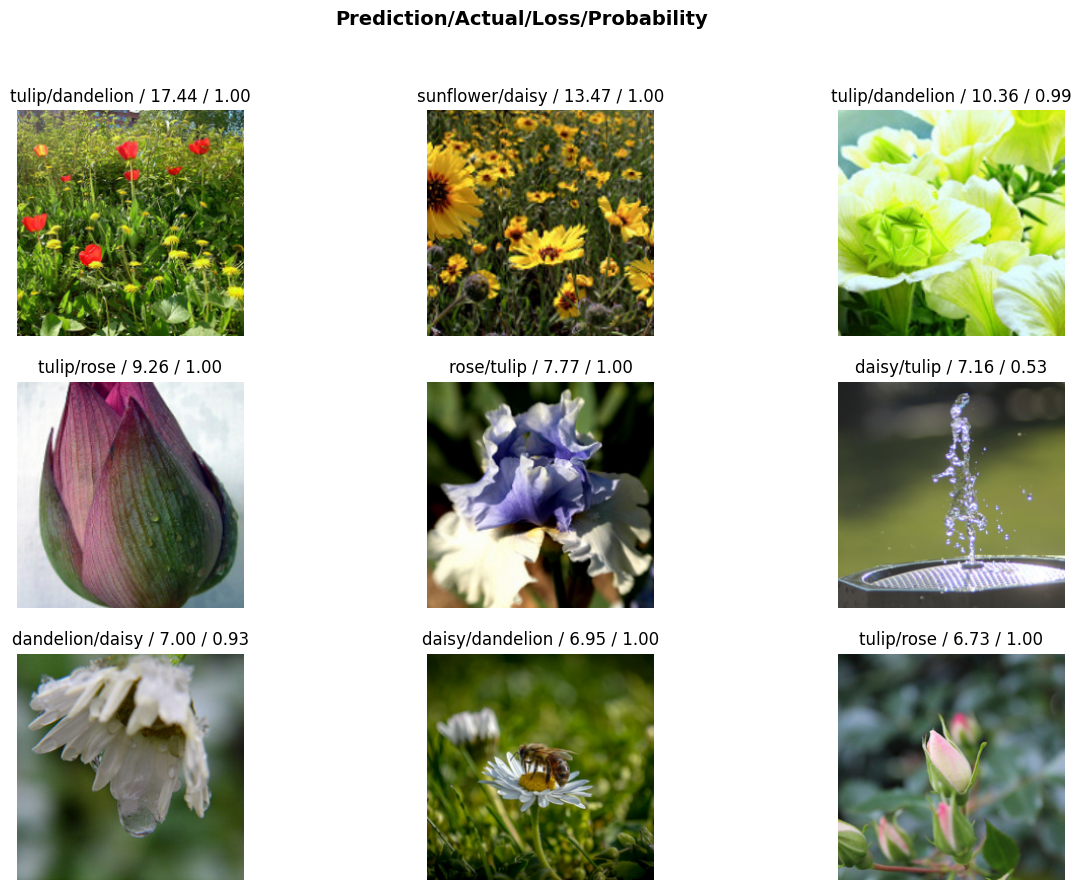

In [19]:
#Showing the biggest losses
interp.plot_top_losses(9, figsize=(15,10))